## Loading Libraries

In [13]:
from skimage.filters import gabor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
from utils.DatasetHelper import *
from utils.ModelHelper import *
from utils.PlotHelper import *

## Dataset Paths

In [3]:
def prepare_X_y_histogran_equalized():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_histogram_equilazed(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_histogram_equilazed(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_edge_boosted():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_edge_boosted(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_edge_boosted(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_edge_boosted_histogram_equalized():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_edge_boosted_histogram_equilazed(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_edge_boosted_histogram_equilazed(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_blurred():
    train_folder = '../../../../Data/merged/train'
    test_folder = '../../../../Data/merged/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_blurred(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_blurred(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y(max_images_per_class=None):
    train_folder = '../../../../Data/merged/train'
    test_folder = '../../../../Data/merged/validation'
    images_train, labels_train = load_images_from_folder_fer_2013(train_folder, max_images_per_class, flatten=False)
    images_test, labels_test = load_images_from_folder_fer_2013(test_folder, max_images_per_class, flatten=False)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_Expw(max_images_per_class=None):
    train_folder = '../../../../Data/Expw-F-Preprocessed_100x100'
    # test_folder = '../../../../Data/Expw/validation'
    X, y = load_images_from_folder_expW(train_folder, max_images_per_class = max_images_per_class)
    # images_test, labels_test = load_images_from_folder_expw(test_folder, max_images_per_class)
    return X, y

In [12]:
# X_h_e,y_h_e = prepare_X_y_histogran_equalized()
# X_e_b,y_e_b = prepare_X_y_edge_boosted()
# X_e_b_h_e,y_e_b_h_e = prepare_X_y_edge_boosted_histogram_equalized()
# X,y = prepare_X_y()
# X_blurred, y_blurred = prepare_X_y_blurred()

X, y = prepare_X_y_Expw(max_images_per_class=7000)


label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/happy
Reached maximum number of images for class happy. Skipping the rest.
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/sad
Reached maximum number of images for class sad. Skipping the rest.
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/fear
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/surprise
Reached maximum number of images for class surprise. Skipping the rest.
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/neutral
Reached maximum number of images for class neutral. Skipping the rest.
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/angry
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/disgust


In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('normal images')
    plt.imshow(X[i].reshape(100, 100), cmap=plt.get_cmap('gray'))

In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('histogram equalized images')
    plt.imshow(X_h_e[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('edge boosted images')
    plt.imshow(X_e_b[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('histogram equalized & edge boosted images')
    plt.imshow(X_e_b_h_e[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


## HOG

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train_hogged, X_test_hogged = apply_hog_and_pca(X_train, X_test, y_train, y_test, shape=100)

knn_preds = classify_with_knn(X_train_hogged, X_test_hogged, y_train, y_test, n_neighbors=30)

Test seti üzerindeki doğruluk: 0.28


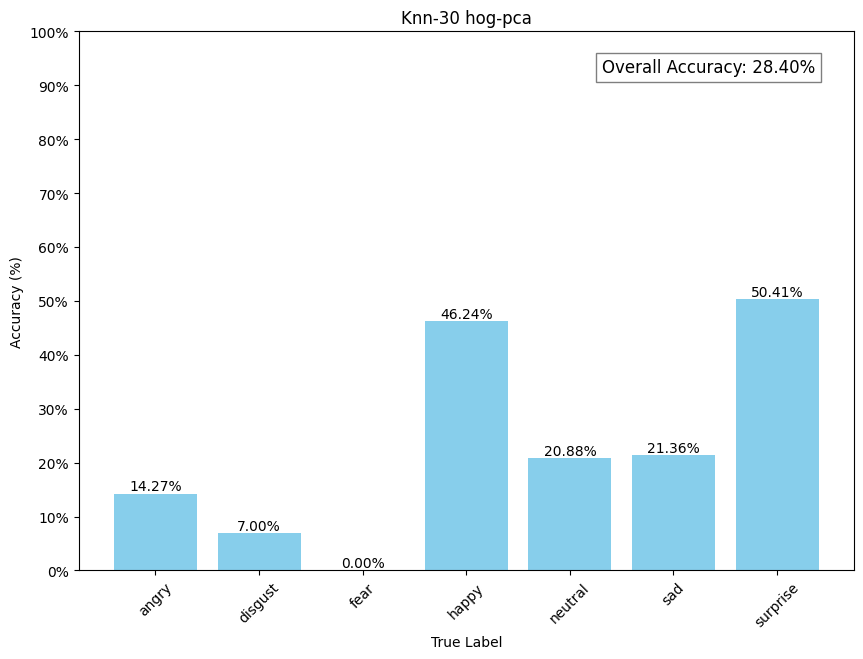

f1 score:  0.25883749286041724


In [15]:
from sklearn.metrics import f1_score


plot_label_accuracies(y_test, knn_preds, 'Knn-30 hog-pca')

#f1 score
f1 = f1_score(y_test, knn_preds, average='weighted')
print('f1 score: ', f1)

In [9]:
from sklearn.ensemble import RandomForestClassifier

def classify_with_randomforest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return y_pred
# xg_preds = classify_with_randomforest(X_train_hogged, X_test_hogged, y_train, y_test)

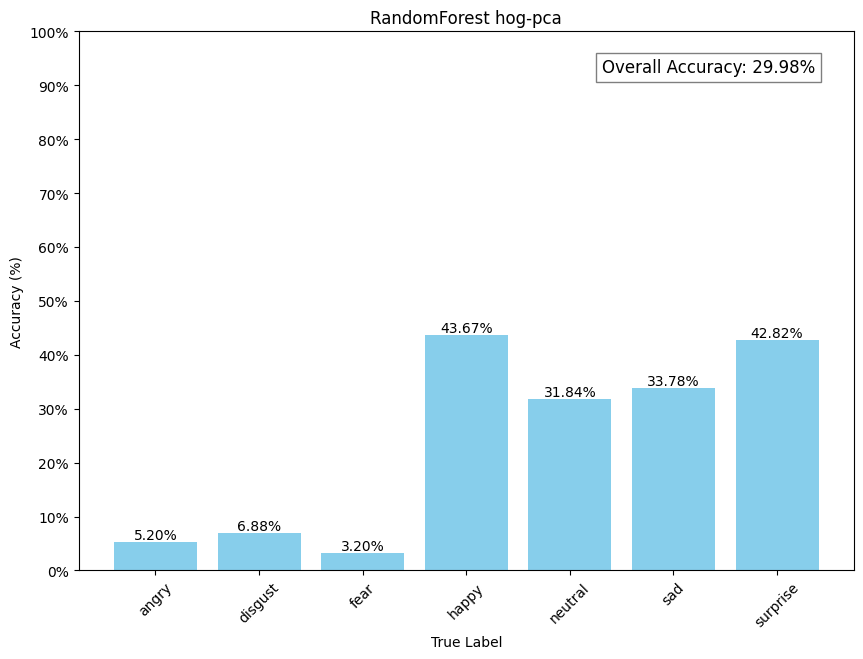

In [26]:
# plot_label_accuracies(y_test, xg_preds, 'RandomForest hog-pca')

In [ ]:
X_train_hogged, X_test_hogged = apply_hog_and_pca(X_train, X_test, y_train, y_test)

knn_preds_30 = classify_with_knn(X_train_hogged, X_test_hogged, y_train, y_test, n_neighbors=30)

In [ ]:
plot_label_accuracies(y_test, knn_preds_30, 'SVM hog-pca')

In [ ]:
X_train_hogged, X_test_hogged = apply_hog_and_pca(X_train, X_test, y_train, y_test)

k_s = [3, 5, 10, 15, 20, 30, 50]
knn_pred_list = []
for k in k_s:
    knn_preds = classify_with_knn(X_train_hogged, X_test_hogged, y_train, y_test, n_neighbors=k)
    knn_pred_list.append({'k': k, 'knn_preds': knn_preds})
    plot_label_accuracies(y_test, knn_preds, 'KNN hog-pca k={}'.format(k))

----

## Window Based HOG

label_folder_path:  ../../../../Data/merged/train/happy
Reached maximum number of images for class happy. Skipping the rest.
label_folder_path:  ../../../../Data/merged/train/sad
Reached maximum number of images for class sad. Skipping the rest.
label_folder_path:  ../../../../Data/merged/train/fear
label_folder_path:  ../../../../Data/merged/train/surprise
Reached maximum number of images for class surprise. Skipping the rest.
label_folder_path:  ../../../../Data/merged/train/neutral
Reached maximum number of images for class neutral. Skipping the rest.
label_folder_path:  ../../../../Data/merged/train/angry
Reached maximum number of images for class angry. Skipping the rest.
label_folder_path:  ../../../../Data/merged/train/disgust
label_folder_path:  ../../../../Data/merged/validation/happy
Reached maximum number of images for class happy. Skipping the rest.
label_folder_path:  ../../../../Data/merged/validation/sad
label_folder_path:  ../../../../Data/merged/validation/fear
label_f

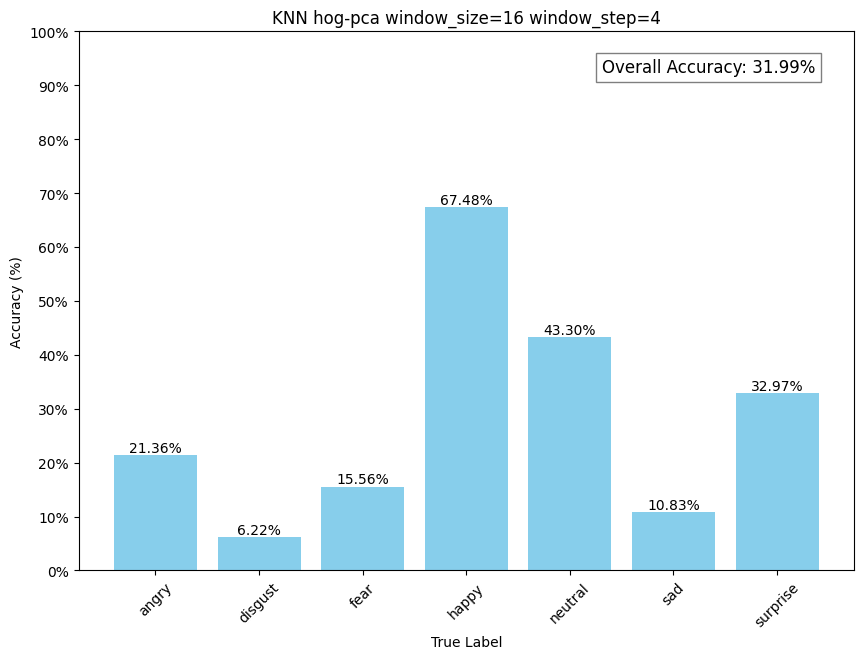

Test seti üzerindeki doğruluk: 0.32


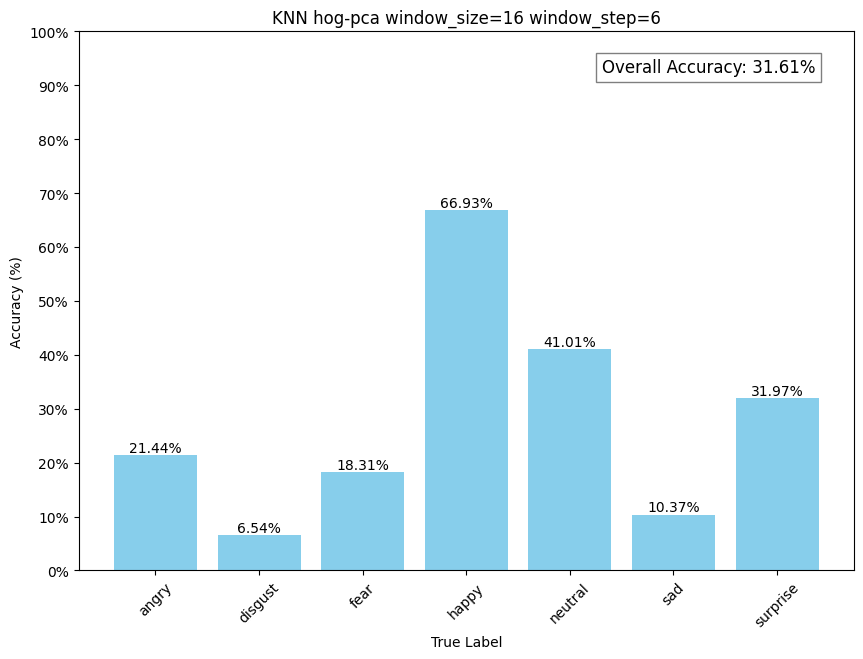

Test seti üzerindeki doğruluk: 0.30


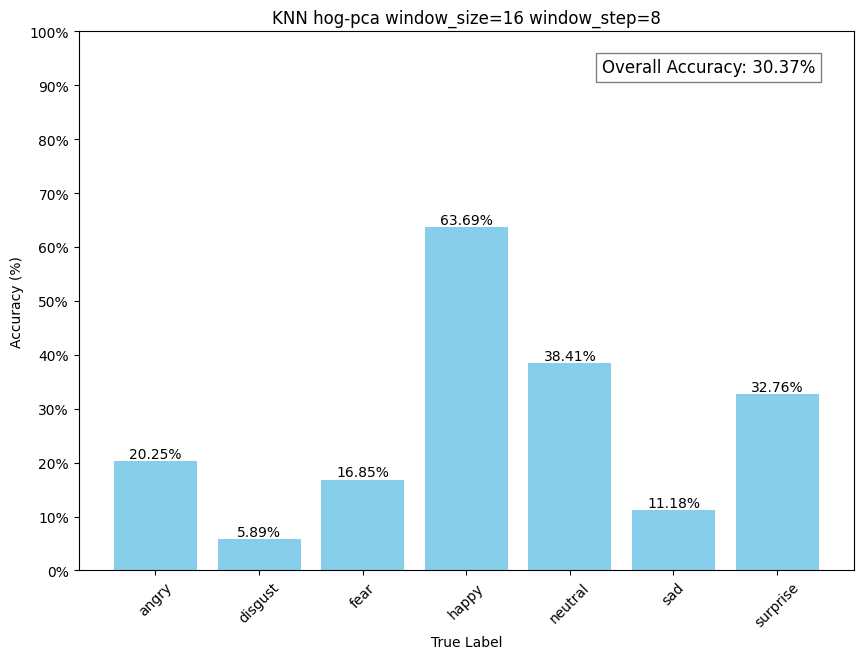

Test seti üzerindeki doğruluk: 0.32


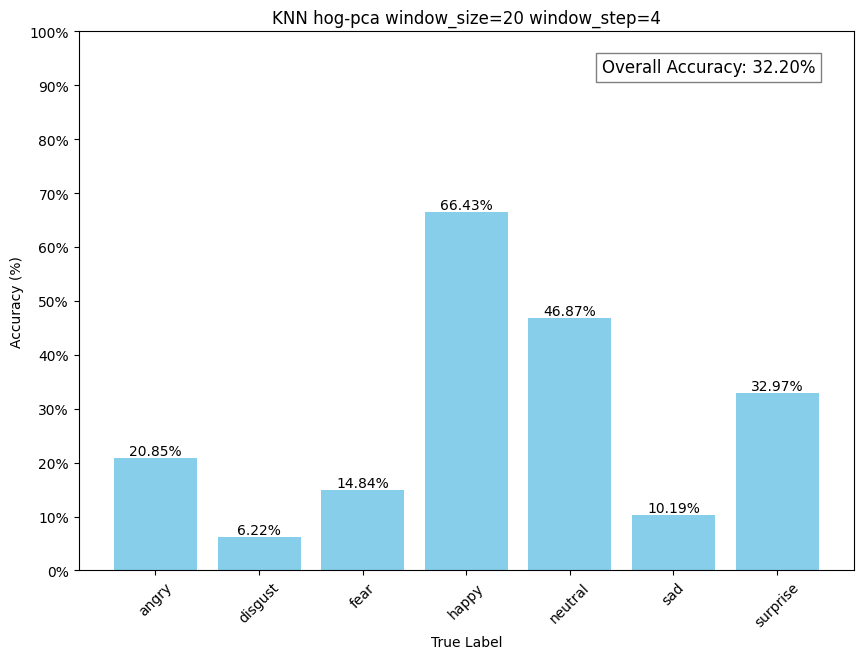

Test seti üzerindeki doğruluk: 0.32


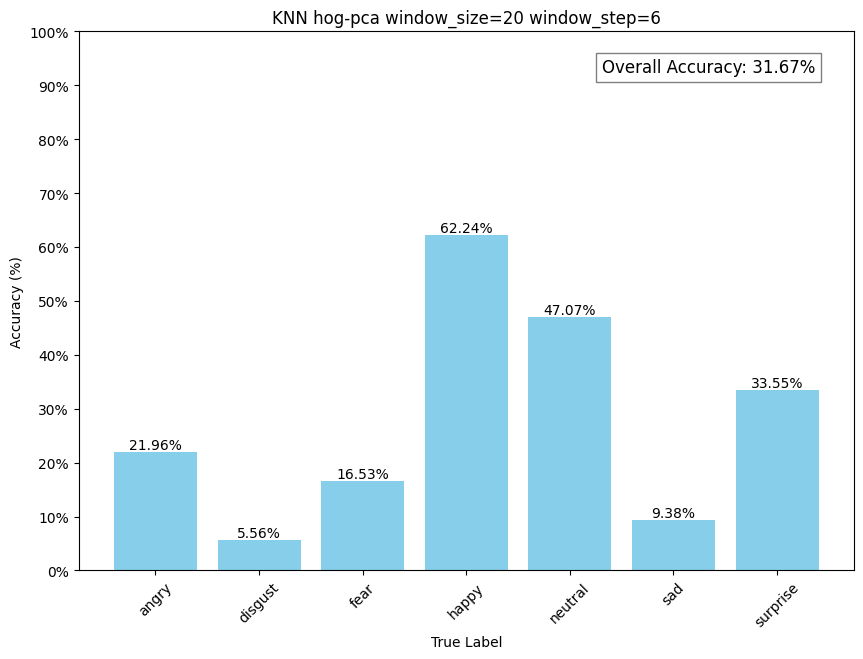

Test seti üzerindeki doğruluk: 0.30


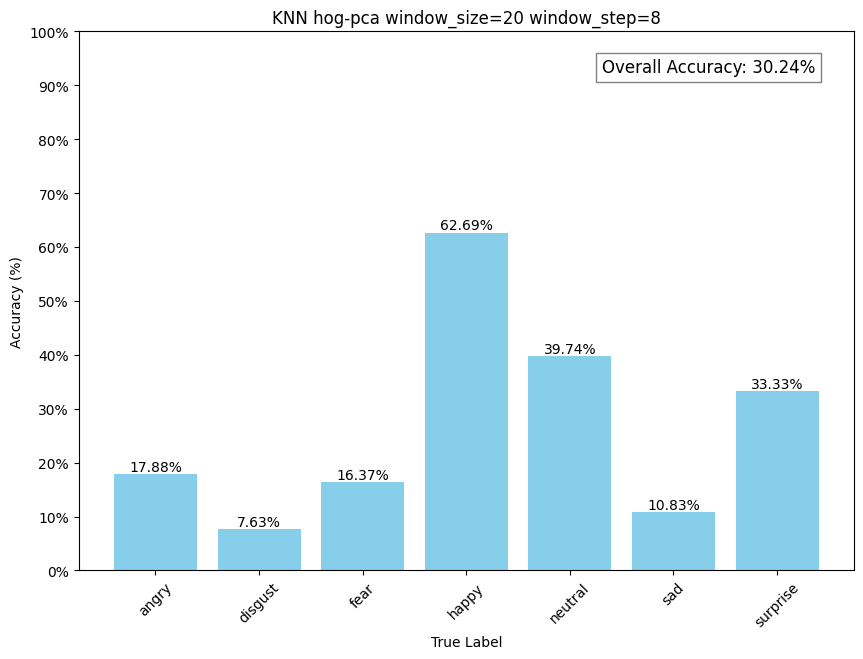

Test seti üzerindeki doğruluk: 0.32


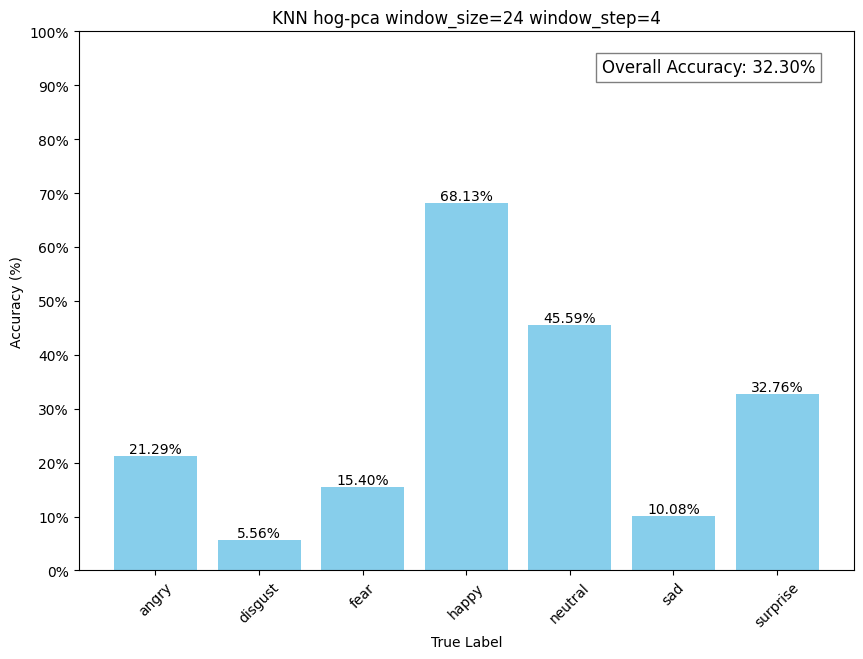

Test seti üzerindeki doğruluk: 0.33


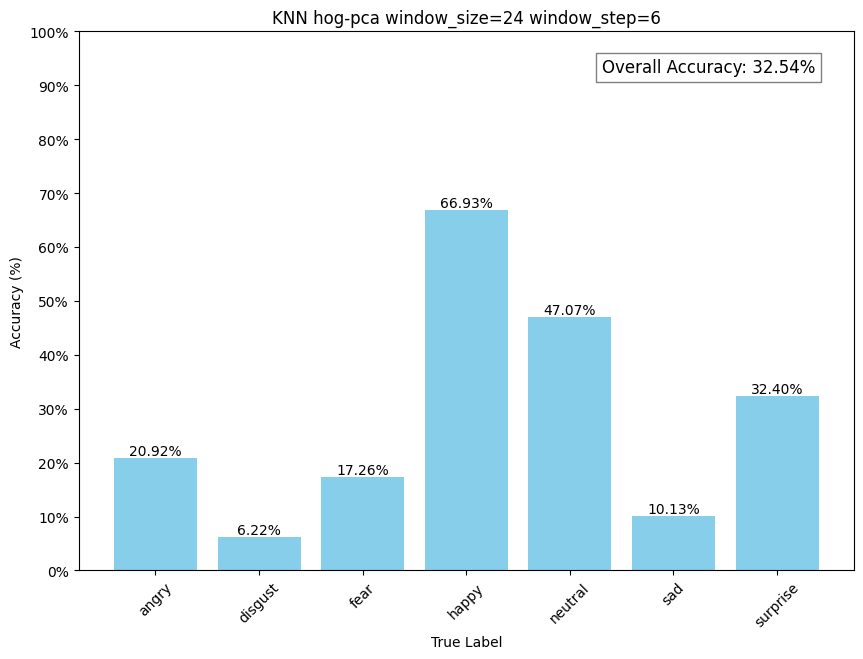

Test seti üzerindeki doğruluk: 0.30


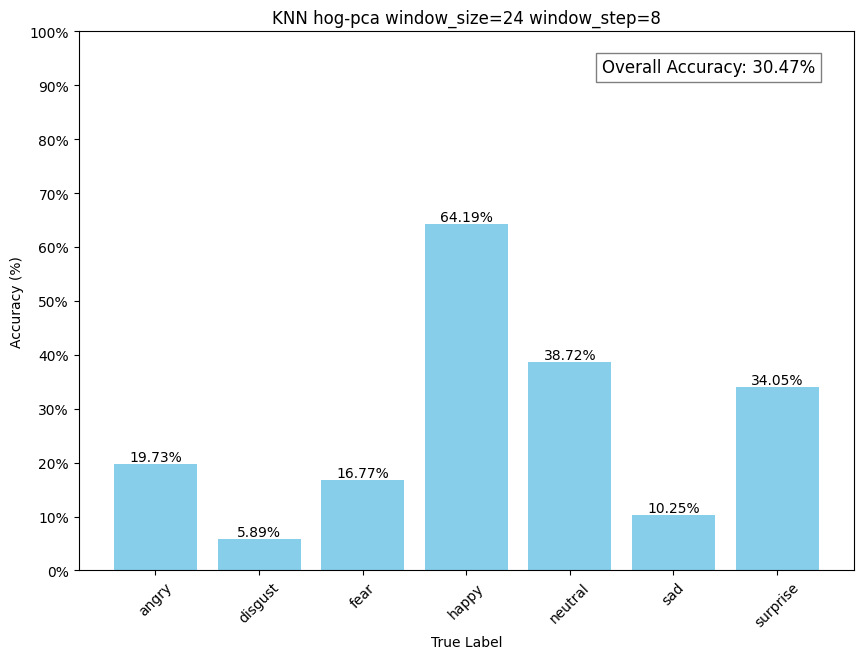

In [4]:
X, y = prepare_X_y(max_images_per_class=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

window_sizes = [16, 20, 24]
window_steps = [4, 6, 8]

predictions_list = []
for window_size in window_sizes:
    for window_step in window_steps:
        X_train_hogged = get_window_based_hog_features(X_train, window_size=window_size, window_step=window_step)
        X_test_hogged= get_window_based_hog_features(X_test, window_size=window_size, window_step=window_step)
        knn_preds = classify_with_knn(X_train_hogged, X_test_hogged, y_train, y_test, n_neighbors=30)
        predictions_list.append({'window_size': window_size, 'window_step': window_step, 'knn_preds': knn_preds})
        plot_label_accuracies(y_test, knn_preds, 'KNN hog-pca window_size={} window_step={}'.format(window_size, window_step))

In [6]:
optimal_window_size = 24
optimal_window_step = 6

X_train_hogged = get_window_based_hog_features(X_train, window_size=optimal_window_size, window_step=optimal_window_step)
X_test_hogged= get_window_based_hog_features(X_test, window_size=optimal_window_size, window_step=optimal_window_step)
svm_preds = classify_with_svm(X_train_hogged, X_test_hogged, y_train, y_test)

Test seti üzerindeki doğruluk: 0.41


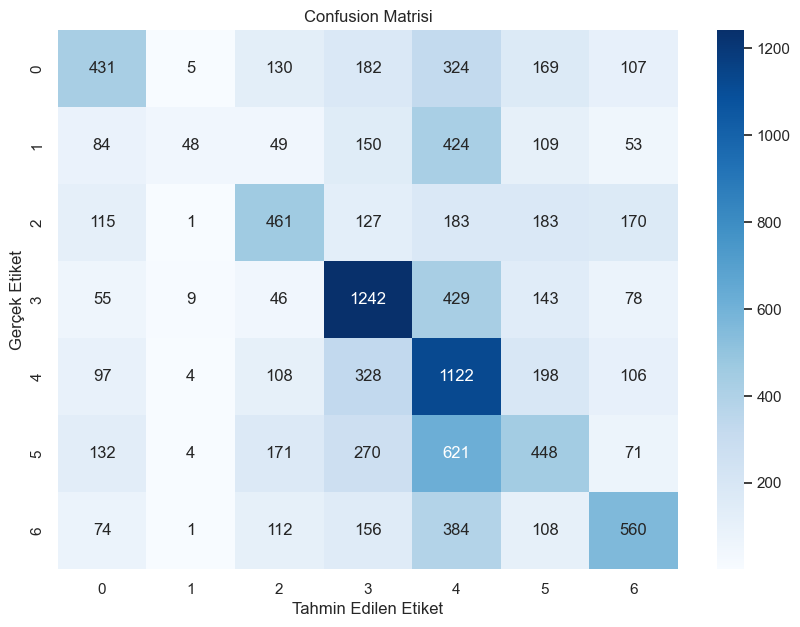

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # seaborn kütüphanesini güzel bir görselleştirme için kullanıyoruz

# Gerçek sınıf etiketleri ve SVM tahminlerini kullanarak confusion matrisi hesaplama
cm = confusion_matrix(y_test, svm_preds)

# Confusion matrisini görselleştir
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrisi')
plt.show()


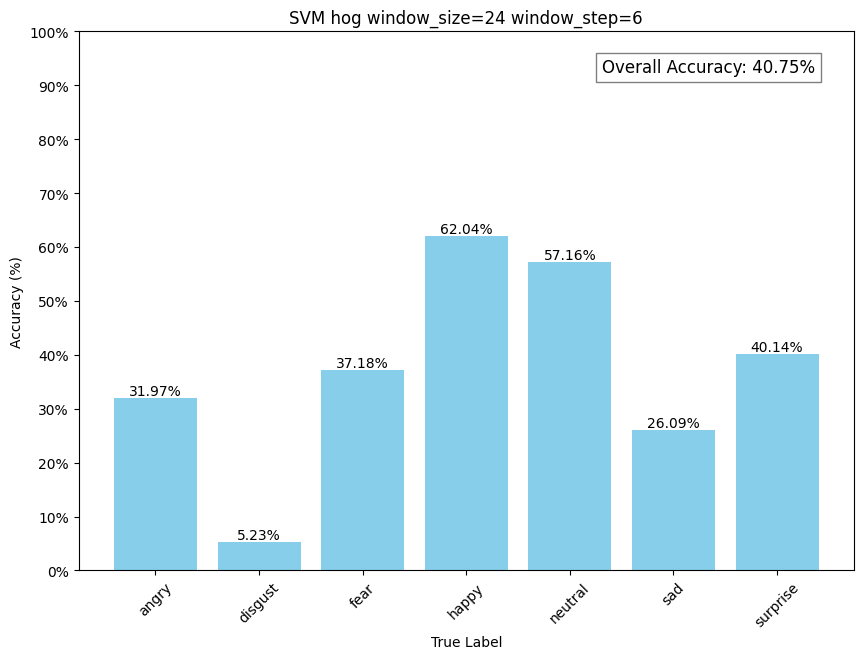

f1 score:  0.38927444913211684


In [14]:
plot_label_accuracies(y_test, svm_preds, 'SVM hog window_size={} window_step={}'.format(optimal_window_size, optimal_window_step))

f1_svm_preds = f1_score(y_test, svm_preds, average='weighted')
print('f1 score: ', f1_svm_preds)

In [ ]:
#convolution matrix
from sklearn.metrics import confusion_matrix


In [10]:
random_forest_preds = classify_with_randomforest(X_train_hogged, X_test_hogged, y_train, y_test)

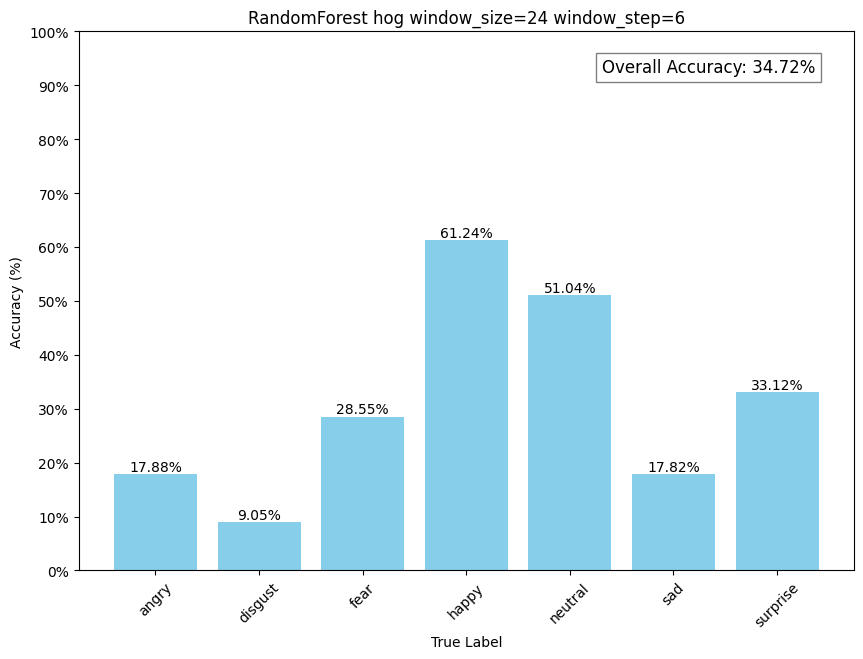

f1 score:  0.3253851347510371


In [16]:
plot_label_accuracies(y_test, random_forest_preds, 'RandomForest hog window_size={} window_step={}'.format(optimal_window_size, optimal_window_step))

f1_random_forest_preds = f1_score(y_test, random_forest_preds, average='weighted')
print('f1 score: ', f1_random_forest_preds)

## Face Landmarks

In [17]:
# %pip install dlib
import dlib

predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
def get_landmarks(image, rects):
    # This function is created based on: http://bit.ly/2cj7Fpq
    if len(rects) > 1:
        raise BaseException("TooManyFaces")
    if len(rects) == 0:
        raise BaseException("NoFaces")
    return np.matrix([[p.x, p.y] for p in predictor(image, rects[0]).parts()])
def get_face_landmarks(images):
    landmarks = []
    for image in images:
        face_rects = [dlib.rectangle(left=1, top=1, right=47, bottom=47)]
        face_landmarks = get_landmarks(image, face_rects)
        landmarks.append(face_landmarks)
    return landmarks
from sklearn.decomposition import PCA
def use_pca(X_train_hog, X_test_hog):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_hog)
    X_test_pca = pca.transform(X_test_hog)
    return X_train_pca, X_test_pca

In [18]:
face_landmarks_train = get_face_landmarks(X_train)
face_landmarks_test = get_face_landmarks(X_test)

In [19]:
landmarks_flattened_train = np.squeeze(np.array([x.flatten() for x in face_landmarks_train]))
landmarks_flattened_test = np.squeeze(np.array([x.flatten() for x in face_landmarks_test]))

# HOG özellikleri ve düzleştirilmiş landmark'ları birleştirme
features_combined_train = np.concatenate((landmarks_flattened_train, X_train_hogged), axis=1)
features_combined_test = np.concatenate((landmarks_flattened_test, X_test_hogged), axis=1)

Test seti üzerindeki doğruluk: 0.32
Test seti üzerindeki doğruluk: 0.32


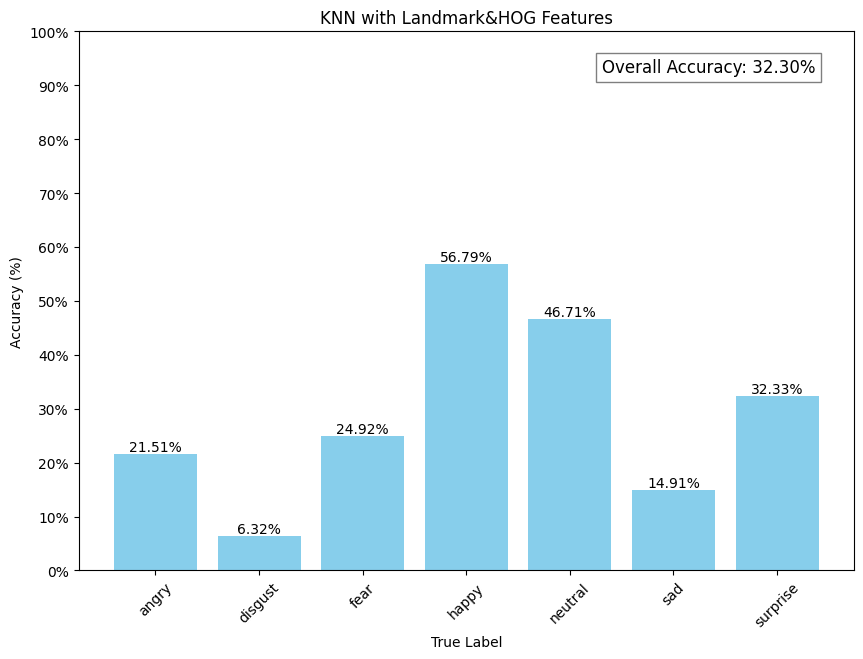

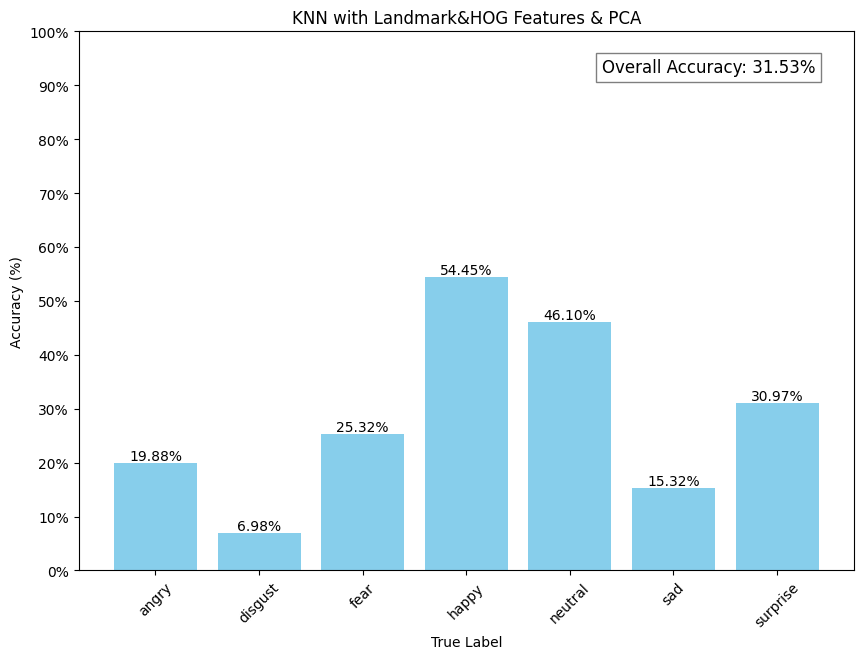

In [20]:
pca_combined_train, pca_combined_test = use_pca(features_combined_train, features_combined_test)
predictions_combined_pca = classify_with_knn(pca_combined_train, pca_combined_test, y_train, y_test, n_neighbors=30)
predictions_combined = classify_with_knn(features_combined_train, features_combined_test, y_train, y_test, n_neighbors=30)
plot_label_accuracies(y_test, predictions_combined, 'KNN with Landmark&HOG Features')
plot_label_accuracies(y_test, predictions_combined_pca, 'KNN with Landmark&HOG Features & PCA')

------

## Gabor

In [ ]:
X_gabor_lda_e_b = apply_gabor_and_pca(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_gabor_lda_e_b, y, test_size=0.2, random_state=42)

y_pred_euclidian = predict_with_euclidean_distance(X_train, y_train, X_test)

In [ ]:
plot_label_accuracies(y_test, y_pred_euclidian, "Euclidian edge_boosted & gabor & pca")